In [18]:
using Pkg
Pkg.add("TypeTree")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [12]:
include("./mm.jl");


In [13]:
const d = deserialize("stock_dict")

Dict{String, Point} with 1684 entries:
  "20MICRONS"    => Point([DateTime("2008-10-06T00:00:00"), DateTime("2008-10-0…
  "JUBLFOOD"     => Point([DateTime("2010-02-08T00:00:00"), DateTime("2010-02-0…
  "BAJFINANCE"   => Point([DateTime("2002-07-01T00:00:00"), DateTime("2002-07-0…
  "FLUOROCHEM"   => Point([DateTime("2019-10-16T00:00:00"), DateTime("2019-10-1…
  "RAJSREESUG"   => Point([DateTime("2002-07-01T00:00:00"), DateTime("2002-07-0…
  "SUNDRMBRAK"   => Point([DateTime("2002-08-12T00:00:00"), DateTime("2002-08-1…
  "WHIRLPOOL"    => Point([DateTime("2002-08-12T00:00:00"), DateTime("2002-08-1…
  "CAREERP"      => Point([DateTime("2010-10-06T00:00:00"), DateTime("2010-10-0…
  "SUNPHARMA"    => Point([DateTime("1996-01-01T00:00:00"), DateTime("1996-01-0…
  "TAKE"         => Point([DateTime("2007-08-27T00:00:00"), DateTime("2007-08-2…
  "VBL"          => Point([DateTime("2016-11-08T00:00:00"), DateTime("2016-11-0…
  "NOIDATOLL"    => Point([DateTime("2002-12-06T00:00:00"), DateTime("

Fact:
let `rd` be the daily rate (not in percentage, but in absolute terms).
then `ry` the yearly rate is given by 
```
ry = (1+rd)^365 - 1
```

and the inverse relationship is 

```
rd = (1+ry)^-365 - 1
```

This is a crazy exponential equation. An yearly rate of `10%` is achived by a daily rate of around `0.03%`

The following graph plots the relation. x axis is daily rate in percentage. y axis is the corresponding yearly rate in percentage

Note also that the maximum negative rate possible is `-100%` at which the initial principal goes to zero.

Note also that from f(0.0%) = 0% to f(0.2%) = 100%, the graph is almost linear, which means that in this region, f(x) = x*365

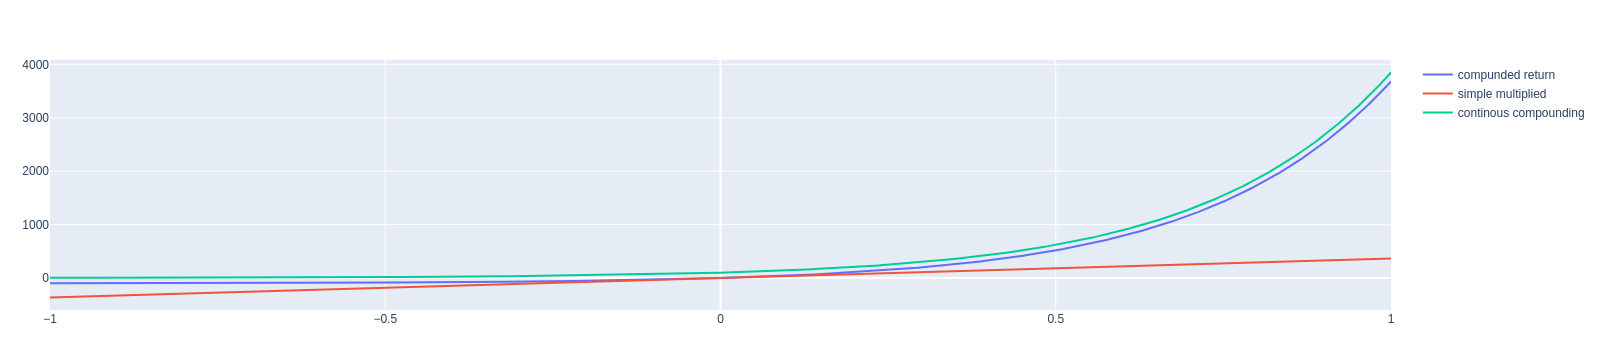

In [27]:
#An example of BigFloat, just in case we need it
# setprecision(BigFloat, 2048) do
#     rd = BigFloat("0.0003")
# #     rd = 0.0003
#     ry = (1+rd)^365 - 1
#     println("ry is  ", ry)
#     rd2 = (1+ry)^(1/365) - 1
#     println("rd2 is    ", rd2)
#     @show rd.prec
# end
rd = -0.01:0.00001:0.01
ry = map(i -> (1+i)^365-1, rd)

rs = map(i->i*365, rd)
re = map(i -> exp(i*365), rd)
trace1 = scatter(x=rd.*100, y=ry.*100,
                    mode="lines",
                    name="compunded return")
trace2 = scatter(x=rd.*100, y=rs.*100,
                    mode="lines",
                    name="simple multiplied")
trace3 = scatter(x=rd.*100, y=re.*100,
                    mode="lines",
                    name="continous compounding")
plot([trace1, trace2, trace3])

In [5]:
#const d = constructDict()
#serialize("stock_dict", d)

#const d = deserialize("stock_dict")

Dict{String, Point} with 1684 entries:
  "20MICRONS"    => Point([DateTime("2008-10-06T00:00:00"), DateTime("2008-10-0…
  "JUBLFOOD"     => Point([DateTime("2010-02-08T00:00:00"), DateTime("2010-02-0…
  "BAJFINANCE"   => Point([DateTime("2002-07-01T00:00:00"), DateTime("2002-07-0…
  "FLUOROCHEM"   => Point([DateTime("2019-10-16T00:00:00"), DateTime("2019-10-1…
  "RAJSREESUG"   => Point([DateTime("2002-07-01T00:00:00"), DateTime("2002-07-0…
  "SUNDRMBRAK"   => Point([DateTime("2002-08-12T00:00:00"), DateTime("2002-08-1…
  "WHIRLPOOL"    => Point([DateTime("2002-08-12T00:00:00"), DateTime("2002-08-1…
  "CAREERP"      => Point([DateTime("2010-10-06T00:00:00"), DateTime("2010-10-0…
  "SUNPHARMA"    => Point([DateTime("1996-01-01T00:00:00"), DateTime("1996-01-0…
  "TAKE"         => Point([DateTime("2007-08-27T00:00:00"), DateTime("2007-08-2…
  "VBL"          => Point([DateTime("2016-11-08T00:00:00"), DateTime("2016-11-0…
  "NOIDATOLL"    => Point([DateTime("2002-12-06T00:00:00"), DateTime("

In [15]:
function companyComparison(p::Float64)
    nn = (symbol=Vector{String}(undef, 0), prob=Vector{Float64}(undef, 0), label=Vector{String}(undef, 0))
    for key in keys(d)
        sss = key
        pp = prob(d, key, 1, 3*365, p)
        label = get(companyToLabel, key, "")
        push!(nn[:symbol], sss)
        push!(nn[:prob], pp)
        push!(nn[:label], label)
    end
    execute(conn, "BEGIN;")
    execute(conn, "drop table if exists work.company_comparison; ")
    execute(conn, """
    create table work.company_comparison (symbol text, prob float, label text)
    """)
    LibPQ.load!(
        nn,
        conn,
        "INSERT INTO work.company_comparison (symbol, prob, label) VALUES (\$1, \$2, \$3);",
    )

    execute(conn, "COMMIT;")
end
companyComparison(0.15)

LoadError: UndefVarError: companyToLabel not defined

In [7]:
prob(d, "TVSMOTOR",1, 3*365, 0.3 )

0.40440653873489696

In [8]:
df = table((x=an,))
summarize((mean, std), df)


LoadError: UndefVarError: an not defined

In [9]:
function foo()
    sql = """ select symbol from indices i where name = 'nifty-500' """
    result = execute(conn, sql)
    return result |> table
end
df = foo()


LoadError: UndefVarError: table not defined

In [24]:
Pkg.add("DataFrames")
using DataFrames
df = CSV.read("/home/sharath/Downloads/AdultDataSet.csv", DataFrame)

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


LoadError: ArgumentError: "/home/sharath/Downloads/AdultDataSet.csv" is not a valid file

In [ ]:
df2 = df[shuffle(1:nrow(df))[1:Int(floor((nrow(df)/5)))], :]

In [ ]:
filter(row->row["education"]==" HS-grad" && row["marital-status"]==" Never-married", df)

In [ ]:
typeof(freqtable(df["education"], df["marital-status"]))

In [ ]:
df |> SQLite.load!(sqlite, "adult")

In [ ]:
df = DBInterface.execute(sqlite, "select * from adult") |> DataFrame

In [10]:
function f(r1::Float64, r2::Float64, x::Float64)
    return ((1+r1)^x) * ((1+r2)^(1-x)) - 1
end
xx  = 0:0.001:0.99
yy = [f(.04, 0.13, x) for x in ran]
plot(xx, yy, hover=string.(xx).*"   ".*string.(yy), size=(1700, 400,))

LoadError: UndefVarError: ran not defined

This is testing an investment strategy. we invest a fixed amount every day for `investDays` days. 
The portfolio is the current list of days that we bought the stocks.
Every day, we also go through our current portfolio. If one of the past day buys have hit more than `rateThreshold`, we sell it. 

After `investDays`, we wait for another `redeemDays` to liquidate any portfolio that remains. After `redeemDays`, we sell whatever is left.
return the amount of money in the wallet after `investDays+redeemDays`

Zerodha has the following transaction fees. 
* charge buy is 1.19 per 1000
* charge sell is 1.04 per 1000
* charge dp is 13.8 per stock per sell per day + 18% GST. since we are dealing with only 1 stock, the charge is 13.8*1.18

````
charge_buy = 1.19/1000 per rupee
charge_sell = 1.04/1000 per rupee
charge_dp = 13.5*1.18 per stock per day
interest_charges = p2(1, fixed_deposit_rate, days_held/365.0) - 1 per rupee

for rupee  p[dayBought]*(1 + charge_buy) =(we get) 1 stock
so for     amount =(we get) amount/(p[dayBought]*(1+charge_buy))

num_stocks = amount/(p[dayBought]*(1+charge_buy))


net_today = num_stock*p[today] - num_stock*p[today]*(charge_sell) - interest_charges - charge_dp
          = num_stock*p[today](1 - charge_sell) - interest_charges - charge_dp

          = amount*p[today](1 - charge_sell) / (p[dayBought]*(1+charge_buy)) - amount*(p2(1, fixed_deposit_rate, days_held/365.0) - 1) - charge_dp
````

In [ ]:
saved = Vector{Float64}(undef, 0)

In [11]:
struct DummyStrategy <: Strategy
end

eps = 0.00000001
#case 1 null strategy, no salary, no walletRate, wallet should remain the same, expected return 0
accountingStrategy = WalletAccountingStrategy(wallet=1000., walletRate=0., salary=0., salaryInterval=30, days=365)
function strategy(::DummyStrategy, ::Tls, w, i) 0. end
@assert abs(runStrategy(accountingStrategy, Tls(365), DummyStrategy())) < eps



#case 2 null strategy, no salary, walletRate should result in walletRate
expected = 0.1
accountingStrategy = WalletAccountingStrategy(wallet=1000., walletRate=0.1, salary=0., salaryInterval=30, days=365)
function strategy(::DummyStrategy, ::Tls, w, i) 0. end
actual = runStrategy(accountingStrategy, Tls(365), DummyStrategy())
@assert abs(expected - actual) < eps "expected: $expected, actual: $actual"

# case 3 just salary, no wallet or wallet rate null strategy should give 0
accountingStrategy = WalletAccountingStrategy(wallet=0., walletRate=0., salary=1000., salaryInterval=30, days=365)
function strategy(::DummyStrategy, ::Tls, w, i) 0. end
actual = runStrategy(accountingStrategy, Tls(365), DummyStrategy())
@assert abs(actual) < eps "expected: $expected, actual: $actual"

#case 4 salary with no wallet but walletRate should give walletRate
accountingStrategy = WalletAccountingStrategy(wallet=0., walletRate=0.1, salary=1000., salaryInterval=30, days=365)
function strategy(::DummyStrategy, ::Tls, w, i) 0. end
actual = runStrategy(accountingStrategy, Tls(365), DummyStrategy())
@assert abs(actual-0.1) < eps "expected: .1, actual: $actual"

#case 5 salary with initial wallet and walletRate but null strategy should return walletRate
accountingStrategy = WalletAccountingStrategy(wallet=1000., walletRate=0.1, salary=1000., salaryInterval=30, days=365)
function strategy(::DummyStrategy, ::Tls, w, i) 0. end
actual = runStrategy(accountingStrategy, Tls(365), DummyStrategy())
@assert abs(actual-0.1) < eps "expected: .1, actual: $actual"


# case 6 a strategy that compounds the wallet returns the compounding rate
# the wallet rate has to be zero otherwise, the first day compounding will take effect
mutable struct DummyStrategy2 <: Strategy 
    w::Float64 
end
function strategy(s::DummyStrategy2, ::Tls, wallet, i)
    if i==1
        s.w = wallet
        -wallet
    elseif i==365
        p2(s.w, 0.2/365., 365)
    else
        0.
    end
end

accountingStrategy = WalletAccountingStrategy(wallet=1000., walletRate=0., salary=0., salaryInterval=30, days=365)
actual = runStrategy(accountingStrategy, Tls(365), DummyStrategy2(0.))
@assert abs(actual-0.2) < eps "expected: .2, actual: $actual"


# case 7 a strategy that randomly invests money and gives randomly gives walletRate return with starting wallet 
# and salary should return walletRate
days = 365
struct Invest
    day::Int
    amnt::Float64
end
mutable struct DummyStrategy3 <: Strategy
    ar::Vector{Int}
    ll::FastList{Invest}
    numBuy::Int
    numSell::Int
end
function strategy(s::DummyStrategy3, ::Tls, wallet::Float64, i::Int)
    # 0 is buy, 1 is sell
    arr = s.ar
    ll = s.ll
    if i==365
        sum = 0.
        for node in ll
            # this will make the wallet go negative, but cant help it. 
            # need for testing. It is because to completely make the wallet zero,
            # we need to take out the interest as well
            sum += p2(node.data.amnt, 0.1/365, i-node.data.day)
        end
        # println("numBuy is $(s.numBuy) numSell is $(s.numSell) total is $(s.numBuy + s.numSell)")
        return sum
    end
    if rand(arr) == 0 && wallet > 0
        amnt = p2(wallet, 0.1/365, i)
        push!(ll, Invest(i, amnt))
        s.numBuy += 1
        return -amnt
    else
        for node in ll
            del(ll, node)
            s.numSell += 1
            return p2(node.data.amnt, 0.1/365, i-node.data.day)
        end
        return 0.
    end
                
end
accountingStrategy = WalletAccountingStrategy(wallet=1000., walletRate=0.1, salary=1000., salaryInterval=30, days=365)
actual = runStrategy(accountingStrategy, Tls(365), DummyStrategy3([0, 1], FastList{Invest}(days), 0, 0))
@assert abs(actual-0.1) < eps "expected: .1, actual: $actual"


LoadError: UndefVarError: Strategy not defined

In [ ]:
# test cases for Strategy1
# test case 1 if amount is less than wallet, can invest
tls = Tls(10)
strt = Strategy1(0.1, 10, 10, 10, RealProfit())
actual = strategy(strt, tls, 100., 1)
@assert actual==-10 "expected 10, got $actual"

# test case 2 if wallet is < amount, cant invest
tls = Tls(10)
strt = Strategy1(0.1, 10, 10, 10, RealProfit())
actual = strategy(strt, tls, 9., 1)
@assert actual==0 "expected 0, got $actual"

# test case 3 if a prev investment has given the rate, then it is sold
tls = Tls([5], [1., 1., 1., 1., 10., 25.995  , 10], [1, 2, 3, 4, 5, 6, 7])
strt = Strategy1(0.1, 10, 10, 10, RealProfit())
for node in tls.ll
    println(node.data)
end
actual = strategy(strt, tls, 0., 6)
@assert actual==10.007100050939378 "expected 10.007100050939378, got $actual"

# test case 3 if a prev investment has given the rate, then it is sold
tls = Tls([5], [1., 1., 1., 1., 10., 25.99  , 10], [1, 2, 3, 4, 5, 6, 7])
strt = Strategy1(0.1, 10, 10, 10, RealProfit())
for node in tls.ll
    println(node.data)
end
actual = strategy(strt, tls, 0., 6)
@assert actual==0 "expected 0, got $actual"


In [ ]:
#test case for dummy profit
actual = profit(TrivialProfit(), 10., 10., 100.)
@assert actual==100 "expected 100, got $actual"

actual = profit(TrivialProfit(), 10., 10., 1.)
@assert actual==1 "expected 1, got $actual"


In [ ]:
#test cases for SipStrategy
#function strategy(strt::SipStrategy, myTls::Tls, wallet::Float64, tradingDayIndex::Int)
tls = Tls([1, 2, 3, 4, 5], [10., 20., 30., 40., 50., 60.], [1, 2, 3, 4, 5, 6])
# total stocks bougth = 60, 30, 20, 15, 12 = 137. sold for 60, 
strt = SipStrategy(600, TrivialProfit())
actual = strategy(strt, tls, 0., 6)
@assert actual==8220 "expected 8220, got $actual"

tls = Tls(FastList{Int}(10), [10., 20], [1, 2], [1.], Normal())
# total stocks bougth = 60, 30, 20, 15, 12 = 137. sold for 60, 
strt = SipStrategy(600, TrivialProfit())
actual = strategy(strt, tls, 20., 1)
@assert actual==-10 "expected -10, got $actual"



In [ ]:
accountingStrategy = WalletAccountingStrategy(wallet=1000., walletRate=0.0, salary=1000., salaryInterval=1, days=365)
tls = Tls(10)
strtg = SipStrategy(1000, TrivialProfit())
runStrategy(accountingStrategy, tls, strtg)

In [13]:
#methodswith(Strategy)
print(join(tt(Strategy), "")) 

Strategy
 ├─ SipStrategy
 └─ Strategy1


In [25]:

abstract type PriceStrategy end
abstract type Profit end

abstract type Strategy end
abstract type AccountingStrategy end
Base.@kwdef struct Tls
    ll::FastList{Int}
    prices::Vector{Float64}
    tradingDays::Vector{Int64}
    ϕ::Vector{Float64}
    dist::Normal
end

Base.@kwdef struct WalletAccountingStrategy <: AccountingStrategy
    wallet::Float64
    walletRate::Float64
    salary::Float64
    salaryInterval::Int
    days::Int
end

Base.@kwdef struct WalletAccountingStrategy2 <: AccountingStrategy
    wallet::Float64
    walletRate::Float64
    salary::Float64
    salaryInterval::Int
    days::Int
end

Base.@kwdef struct WeinerPriceStrategy <: PriceStrategy
    μ::Float64
    σ::Float64
end

Base.@kwdef mutable struct Strategy1 <: Strategy
    rateThreshold::Float64
    investDays::Int
    redeemDays::Int
    amount::Float64
    profit::Profit
end
Base.@kwdef struct TrivialProfit <: Profit
    
end
Base.@kwdef struct RealProfit <: Profit
    
end

function profit(::TrivialProfit, amount::Float64, initialPrice::Float64, nowPrice::Float64)
    return amount*nowPrice/initialPrice
end

#invested `amount` at initialPrice. now it is `nowPrice`
function profit(::RealProfit, amount::Float64, initialPrice::Float64, nowPrice::Float64)
    charge_buy::Float64 = 1.19/1000
    charge_sell::Float64 = 1.04/1000
    charge_dp::Float64 = 13.5*1.18
    return amount*nowPrice*(1 - charge_sell) / (initialPrice*(1+charge_buy)) - charge_dp
end


Base.@kwdef struct SipStrategy <: Strategy
    amount::Float64
    profit::Profit
end

function strategy(strt::SipStrategy, myTls::Tls, wallet::Float64, tradingDayIndex::Int)
    ll::FastList{Int} = myTls.ll
    prices = myTls.prices
    tradingDays = myTls.tradingDays
    days::Int = length(prices)
    amount::Float64 = strt.amount
    
    if tradingDayIndex < days
        push!(ll, tradingDayIndex)
        return -prices[tradingDayIndex]
    else
        sum::Float64 = 0
        for node in ll
            dayBought::Int = node.data
            daysHeld::Int = tradingDays[tradingDayIndex] - tradingDays[dayBought]
            net_today::Float64 = profit(strt.profit, amount, prices[dayBought], 
                prices[tradingDayIndex])
            sum += net_today
        end
        return sum
    end
end

function strategy(strt::Strategy1, myTls::Tls, wallet::Float64, tradingDayIndex::Int)
    rateThreshold::Float64 = strt.rateThreshold
    investDays::Int = strt.investDays
    redeemDays::Int = strt.redeemDays
    amount::Float64 = strt.amount
    days::Int = investDays+redeemDays
    
    ll::FastList{Int} = myTls.ll
    prices = myTls.prices
    tradingDays = myTls.tradingDays
    
    net::Float64 = 0.
    for node in ll
        dayBought::Int = node.data
        daysHeld::Int = tradingDays[tradingDayIndex] - tradingDays[dayBought]
        net_today::Float64 = profit(strt.profit, amount, prices[dayBought], prices[tradingDayIndex])
        net_today = max(net_today, 1)
        rate::Float64 = r(amount, net_today, daysHeld/365.0);
        # println("dayBought:$dayBought daysHeld:$daysHeld amount:$amount prices[dayBought]:$(prices[dayBought])")
        # println("prices[tradingDayIndex]:$(prices[tradingDayIndex]) net_today:$net_today")
        # println("rate:$rate")
        if rate > rateThreshold || tradingDayIndex==days
            del(ll, node)      
            net += net_today
        end
    end
    if tradingDays[tradingDayIndex] <= investDays && amount < wallet
        push!(ll, tradingDayIndex)
        net -= amount
    end
    return net
end


function runStrategy(acc::WalletAccountingStrategy, myTls::Tls, strtg::Strategy)
    wallet::Float64 = acc.wallet
    walletRate::Float64 = acc.walletRate
    salary::Float64 = acc.salary
    days::Int = acc.days
    tradingDays = myTls.tradingDays
    salaryInterval = acc.salaryInterval
    
    lastSalaryDay = 1
    lastTradingDay = 1
    
    for day::Int in 1:days
        cashFlow::Float64 = strategy(strtg, myTls, wallet, day)
        if tradingDays[day] >= tradingDays[1] + salaryInterval*lastSalaryDay
            cashFlow += salary          
            lastSalaryDay += 1
        end
        if abs(cashFlow) > 0.001
            daysHeld = tradingDays[day] - tradingDays[lastTradingDay] + 1
            wallet = p2(wallet, walletRate/365.0, daysHeld) + cashFlow
            lastTradingDay = day
        end
    end
end


function runStrategy(acc::WalletAccountingStrategy, myTls::Tls, strtg::Strategy)
    # the wallet at the beginning of day 1
    wallet::Float64 = acc.wallet
    walletRate::Float64 = acc.walletRate
    salary::Float64 = acc.salary
    days::Int = acc.days
    tradingDays = myTls.tradingDays
    salaryInterval = acc.salaryInterval
    # the day after the last trade happened
    lastTradingDay = 1
    lastSalaryDay = 1
    walletBegin::Float64 = wallet
    for day::Int in 1:days
        # cashFlow always accrues at the end of the day, by convention
        cashFlow::Float64 = strategy(strtg, myTls, wallet, day)
        if tradingDays[day] >= tradingDays[1] + salaryInterval*lastSalaryDay
            cashFlow += salary
            walletBegin += p1(salary, walletRate/365., tradingDays[day]-tradingDays[1]+1)
            
            lastSalaryDay += 1
        end
        if abs(cashFlow) > 0.001
            daysHeld = tradingDays[day] - tradingDays[lastTradingDay] + 1
            wallet = p2(wallet, walletRate/365.0, daysHeld) + cashFlow
            lastTradingDay = day+1
        end
    end
    if lastTradingDay <= days
        daysHeld = tradingDays[days] - tradingDays[lastTradingDay] + 1
        wallet = p2(wallet, walletRate/365.0, daysHeld)
    end
    return r(walletBegin, wallet, tradingDays[days] - tradingDays[1] + 1)*365
end

function Tls(days)::Tls
    tls = Tls(FastList{Int}(days), Vector{Float64}(undef, days), 
            Vector{Int64}(undef, days), Vector{Float64}(undef, days), Normal(0, 1))
    for i in 1:days
        tls.tradingDays[i] = i
    end
    return tls
end

function Tls(history::Vector{Int}, prices::Vector{Float64}, 
        tradingDays::Vector{Int64})
    days = length(prices)
    return Tls(FastList{Int}(history), prices, tradingDays,  Vector{Float64}(undef, days), Normal(0, 1))
end
function run(acc::A, priceStrategy::P, strategy::S, days::Int) where {A<:AccountingStrategy,
        P <: PriceStrategy, S <: Strategy}
    tls = Vector{Tls}(undef, Threads.nthreads())
    Threads.@threads for i in 1:Threads.nthreads()
        tls[Threads.threadid()] = Tls(days)
    end
    Threads.@threads for run::Int in 1:runs
        tid = Threads.threadid()
        myTls = tls[tid]
        fillPrice!(priceStrategy, myTls)
        reset!(acc)
        runStrategy(acc, myTls, strategy)
        summarizeAccountingStrategy(acc, myTls)
        summarizeStrategy(strategy)
    end
end
function fillPrice!(priceStrategy::WeinerPriceStrategy, myTls::Tls)
    weiner(myTls.days, priceStrategy.μ, priceStrategy.σ, myTls.prices, myTls.ϕ, myTls.dist)
end





fillPrice! (generic function with 1 method)

In [26]:
io = initLogging()
# this strategy takes into account a "wallet" backed by a fixed deposit, which earns a risk free interest
# and a periodic "salary" infusion every month. The effective rate is the rate which will make the initial
# wallet equal to the final wallet
# it also considers some rough accounting for tax. Fixed deposit at 30%, LTCG at 10% and STCG at 15%
# this is WIP!!
function strategy3(rateThreshold::Float64, investDays::Int, redeemDays::Int, ll::FastList{Int}, 
        tradingDays::AbstractVector{Int}, prices::AbstractVector{Float64})
    days::Int = investDays+redeemDays
    wallet::Float64 = 13000000;
    walletRate::Float64 = 5.0/100.0
    walletTax::Float64 = 0.7
    salary::Float64 = 300000 
    amount = 1000.0;
    
    maxDaysHeld::Int = 0;
    minWallet = 0;
    rateGeom::Float64 = 1.0;
    totDaysHeld::Float64 = 0
    reset!(ll)
    
    for i::Int in 1:days
        for node in ll
            dayBought::Int = node.data
            daysHeld::Int = tradingDays[i] - tradingDays[dayBought]
            net_today::Float64 = net_today_f(amount, prices[dayBought], prices[i], daysHeld)
            net_today = max(net_today, 1)
            rate::Float64 = r(amount, net_today, daysHeld/365.0);
            if rate > rateThreshold || i==days
                wallet += net_today
                maxDaysHeld = max(maxDaysHeld, daysHeld);
                totDaysHeld += daysHeld;
                rateGeom = rateGeom * (1+rate)^(daysHeld/365);
                del(ll, node)                
            end
        end
        if i <= investDays
            wallet -= amount
            push!(ll, i)
        end
        minWallet = min(wallet, minWallet)

    end
    return rateGeom^(365.0/totDaysHeld) - 1, wallet;
end
# this strategy will invest 1000 everyday. And everyday, it will redeem all past investment that hit a rateThreshold.
# this is done for investDays. After investDays, for an additional redeemDays, no more investment is made but existing investment 
# is tried to be redeemed
function strategy1(rateThreshold::Float64, investDays::Int, redeemDays::Int, ll::FastList{Int}, 
        tradingDays::AbstractVector{Int}, prices::AbstractVector{Float64})
    days::Int = investDays+redeemDays
    wallet::Float64 = 0.0;
    amount = 1000.0;
    
    maxDaysHeld::Int = 0;
    minWallet = 0;
    rateGeom::Float64 = 1.0;
    totDaysHeld::Float64 = 0
    reset!(ll)
    
    for i::Int in 1:days
        for node in ll
            dayBought::Int = node.data
            daysHeld::Int = tradingDays[i] - tradingDays[dayBought]
            net_today::Float64 = net_today_f(amount, prices[dayBought], prices[i], daysHeld)
            net_today = max(net_today, 1)
            rate::Float64 = r(amount, net_today, daysHeld/365.0);
            if rate > rateThreshold || i==days
                wallet += net_today
                maxDaysHeld = max(maxDaysHeld, daysHeld);
                totDaysHeld += daysHeld;
                rateGeom = rateGeom * (1+rate)^(daysHeld/365);
                del(ll, node)                
            end
        end
        if i <= investDays
            wallet -= amount
            push!(ll, i)
        end
        minWallet = min(wallet, minWallet)

    end
    return rateGeom^(365.0/totDaysHeld) - 1, wallet;
end

#this strategy will simply invest 1000 everyday and redeem at the end of investDays+redeemDays. After which everything is redeemed.
#redeemDays has no other special significance
function strategy2_sip(rateThreshold::Float64, investDays::Int, redeemDays::Int, ll::FastList{Int}, 
        tradingDays::AbstractVector{Int}, prices::AbstractVector{Float64})
    days::Int = investDays+redeemDays
    wallet::Float64 = 0.0;
    amount = 1000.0;
    
    maxDaysHeld::Int = 0;
    minWallet = 0;
    rateGeom::Float64 = 1.0;
    totDaysHeld::Float64 = 0
    reset!(ll)
    
    for i::Int in 1:days
        wallet -= amount
        push!(ll, i)
        minWallet = min(wallet, minWallet)
    end
    
    for node in ll
        dayBought::Int = node.data
        daysHeld::Int = tradingDays[days] - tradingDays[dayBought]
        net_today::Float64 = net_today_f(amount, prices[dayBought], prices[days], daysHeld)
        net_today = max(net_today, 1)
        rate::Float64 = r(amount, net_today, daysHeld/365.0);
        wallet += net_today
        maxDaysHeld = max(maxDaysHeld, daysHeld);
        totDaysHeld += daysHeld;
        if(rateGeom != Inf && rateGeom * (1+rate)^(daysHeld/totDaysHeld) == Inf)
            println("amount=$amount net_today=$net_today daysHeld=$daysHeld rate=$rate rateGeom=$rateGeom")
        end
        rateGeom = rateGeom * (1+rate)^(daysHeld/totDaysHeld);
        del(ll, node)                
    end
    return rateGeom - 1, wallet;
end

#this strategy will simply invest 1000 on day 1 and redeem it on investDays+redeemDays
function strategy3_basic(rateThreshold::Float64, investDays::Int, redeemDays::Int, ll::FastList{Int}, 
        tradingDays::AbstractVector{Int}, prices::AbstractVector{Float64})
    days::Int = investDays+redeemDays
    amount = 1000.0;
    wallet::Float64 = -amount;
    dayBought::Int = 1
    daysHeld::Int = days
    net_today::Float64 = net_today_f(amount, prices[dayBought], prices[days], daysHeld)
    net_today = max(net_today, 1)
    rate::Float64 = r(amount, net_today, daysHeld/365.0);
    wallet += net_today
    return rate, wallet

    
end

function simulateWeinerMulti(tls::Vector{Tls},  d::Dict{String, Point}, investDays::Int, redeemDays::Int)
    runs::Int = 1000
    
    days = investDays + redeemDays; 
    results = Vector{Float64}(undef, 0)
    rateGeoms = Vector{Float64}(undef, 0)
    
    
    rateThreshold::Float64 = .15; μ=meanNiftyPerDay; σ=stdNiftyPerDay;
    # apply the stupid correction
    μ -= σ^2/2
    prices=Vector{Float64}(undef, days);
    tradingDays = collect(1:days)
    
    lk = Threads.SpinLock()
    printed = false
    traces = Vector{Any}(undef, 0)
    Threads.@threads for run::Int in 1:runs
        tid = Threads.threadid()
        myTls = tls[tid]
        brk = false
        weiner(days, μ, σ, myTls.prices, myTls.ϕ, myTls.dist)
        # copy!(myTls.prices, saved)
        reset!(myTls.ll)
        rateGeom, wallet = strategy3_basic(rateThreshold, investDays, redeemDays, myTls.ll, tradingDays, myTls.prices)
# trace1 = scatter(x=1:length(d["^NSEI"].intDates), y=d["^NSEI"].prices,
#                     mode="lines+markers",
#                     name="nifty 50")
        lock(lk) do
            if wallet < 0
                push!(traces, (scatter(x=1:days, y=myTls.prices[1:days], mode="lines
                        ", name="$wallet"), wallet))
            end
            push!(results, wallet)
            push!(rateGeoms, rateGeom)
        end
    end
    
    tracesList = Vector{GenericTrace}(undef, 0)
    sort!(traces, by=x -> x[2], rev=true)
    
    count = 0
    # for i in 1:length(traces)
    #     count+=1
    #     push!(tracesList, traces[i][1])
    #     if count > 10
    #         display(plot(tracesList))
    #         empty!(tracesList)
    #         count = 0
    #     end
    # end
    # display(plot(tracesList))
    
        
    display( plot([histogram(x=results)]))
    display(plot([histogram(x=rateGeoms)]))
    println("mean is $(mean(results)), stdev is $(std(results))")
    println("mean is $(mean(rateGeoms)), stdev is $(std(rateGeoms))")
    println("amount invested is $(1000*days)")
end


@time simulateWeinerMulti(tls, d, 365*10, 0)
# may 5th 2017 to nov 24 2017
flush(io)

LoadError: SystemError: opening file "/mnt/ramdisk/log.log": No such file or directory

In [ ]:
typeof([scatter(x=1:4, y=1:4)])

In [ ]:
function rare(mean::Float64, std::Float64, movement::Float64)
    return 1-cdf(Normal(mean, std), movement)
end


In [ ]:
rare(.077, 0.06, (abs(0.077 - (.13))))

The following graph is interesting. the red is the start time where the returns are negative. we can infer that it happened because of the market crash in 2020

In [ ]:
trace1 = scatter(x=1:length(d["^NSEI"].intDates), y=d["^NSEI"].prices,
                    mode="lines+markers",
                    name="nifty 50")
trace2 = scatter(x=1587:1660, y=d["^NSEI"].prices[1587:1660],
                    mode="lines+markers",
                    name="start times where the returns are negative")
add = 4*365
trace3 = scatter(x=(1587+add):(1660+add), y=d["^NSEI"].prices[(1587+add):(1660+add)],
                    mode="lines+markers",
    name="end times of the start times")

println(typeof(trace1))
plot([trace1, trace2, trace3])


In [ ]:
trace1 = scatter(x=d["^NSEI"].dates, y=d["^NSEI"].prices,
                    mode="lines+markers",
                    name="nifty 50")

plot([trace1])

In [ ]:
# input, an array of prices
# output, an array of rates, where rate[i] = price[i]-price[i-1]*100/price[i-1]
function rates(ppp::Vector{Float64}, func)
    diffs = Vector{Float64}(undef, 0)
    for i in 2:length(ppp)
        push!(diffs,func(ppp[i-1], ppp[i]))
    end
    return diffs
end

function interest1(a::Float64, b::Float64)
    # this is actually equivalent to log(b/a)
    return log((1+log(b/a))^365) / 365
end

function interest2(a::Float64, b::Float64)
    # this is also equivalent to log(b/a)
    return (b-a)/a
end

#something weird
function interest3(a::Float64, b::Float64)
    return log(1+r(a, b, 1/365.0))/365
end

#this is the correct interest
function interest4(a::Float64, b::Float64)
    return log(b/a)
end

#prints the daily histogram of the stock
function analyse_nse(d::Dict{String, Point})
    p = d["^NSEI"]
    dates, prices, intDates = (p.dates, p.prices, p.intDates)
#     diffs = rates(prices)
    #histogram(diffs)
#     ptiles = nquantile(diffs, 100)[40:60]
#     plot((1:100)[40:60], ptiles)
#     l = length(diffs)
    println("interest1 mean is $(mean(rates(prices, interest1))) std is $(std(rates(prices, interest1)))");
    println("interest2 mean is $(mean(rates(prices, interest2))) std is $(std(rates(prices, interest2)))");
    # println("interest3 mean is $(mean(rates(prices, interest3))) std is $(std(rates(prices, interest3)))");
    mn = mean(rates(prices, interest4))
    sgm = std(rates(prices, interest4))
    rmn = mn + sgm*sgm/2
    println("interest4 mean is $(mean(rates(prices, interest4))) std is $(std(rates(prices, interest4)))");
    println("meanNiftyPerDay is $rmn and stdNiftyPerDay is $sgm")
#     plot([histogram(x=sort!(diffs)[trunc(Int, l/4):trunc(Int, 3l/4)], nbins=50)])
#     plot([histogram(x=diffs, nbins=100)])

end
analyse_nse(d)

# The following graph plots the yearwise mean and std deviation of nifty

In [ ]:
#fuck
function analyse_nse(d::Dict{String, Point})
    p = d["^NSEI"]
    dates, prices, intDates = (p.dates, p.prices, p.intDates)
    hashes = Dict{Int64, Vector{Float64}}()
    for i in 1:length(dates)
        year = Dates.year(dates[i])
        if !haskey(hashes, year)
            hashes[year] = Vector{Float64}(undef, 0)
        end
        push!(hashes[year], prices[i])
    end
    years = Vector{Int}(undef, 0)
    means = Vector{Float64}(undef, 0)
    stds = Vector{Float64}(undef, 0)
    for year in sort!(collect(keys(hashes)))
        ar = filter(x -> !isnan(x), rates(hashes[year]))
        push!(means, mean(ar))
        push!(stds, std(ar))
        push!(years, year)
    end
    println("mean is entire nifty is $(mean(rates(prices))) and std of entire nifty is $(std(rates(prices)))")
    plot(scatter(x=years, y=means,  mode="lines+markers",   error_y=attr(
        type="data",
        array=stds
    )))
end
analyse_nse(d)

In [ ]:
#Prints the biggest losers in the set of stock since now()-days to now()
function losers(d::Dict{String, Point}, stocks::Vector{String}, days::Int)
    rates = Vector{@NamedTuple{stock::String, rate::Float64}}(undef, 0)
    for stock in stocks
        if !haskey(d, stock)
            continue
        end
        a = d[stock].prices[end-days]
        b = d[stock].prices[end]
        rate = (b-a)*100/a
        push!(rates, (stock=stock, rate=rate))
    end
    sort!(rates, by=tup->tup.rate)
    return rates
end
losers(d, labelToCompany["niftysmallcap50"], 45)

In [ ]:
Vector{@NamedTuple{a::Int, b::String}}

# Experimentation on multidimensional array speeds

array iteration speed is about 1 billion per second. insane.

In [ ]:
function test(ar::Array{Int64})
    sum = 0
    for i in 1:1000
        for j in 2:length(ar)
            sum+=ar[j]
#             ar[j]+=ar[j-1]
        end
    end
    return sum
end
time_sum(x) = @time test(x);
time_sum(ar)
println(typeof(ar), size(ar))


# Speeds of DataFrames
fucking dataframes is not type stable so it is 100-1000x slower than array iteration and allocates a large amount of memory

There are several table like structures in julia (mostly third parties, several of them seem to be overlapping a lot in functionality)
The best one seems to be IndexedTable. it is type stable. It is implementated as a NamedTuple of vectors but acts like a vector of NamedTuples.
Of course, the fastest and most native is just NamedTuple. But it seems like a NamedTuple (and also IndexedTable) with many columns might stress the compiler (havent tested it)

IndexedTable constructor *copies* the data from the NamedTuple constructor param to create the new IndexedTable. However, invoking `IndexedTable.columns ` returns a NamedTuple *view* of the IndexedTable which is perfect for arbitrary iteration and modifications.

btw, the nomenclature is really fucked up.
- [Julia Data](https://github.com/JuliaDatahttps://github.com/JuliaData) is the name for all built in table like structures in Julia. They all seem to respect the Tables.jl interface
- [JuliaDB](https://juliadata.github.io/JuliaDB.jl/latest/https://juliadata.github.io/JuliaDB.jl/latest/) is one particular table like structure in Julia Data. It is built on `IndexedTables` (seems like both are synonymous). This is the best since it is type stable
- [DataFrames](https://github.com/JuliaData/DataFrames.jlhttps://github.com/JuliaData/DataFrames.jl) is a slow and fucked up implementation in Julia Data. It is feature rich but fucking slow
- [Julia Databases](https://juliadatabases.github.io/https://juliadatabases.github.io/) collects various drivers for different databases like Mysql, postgres, sqlite. seems like all of them can stream to a tables.jl constructor

A good summary of all the shit can be found [here](https://www.juliabloggers.com/a-tour-of-the-data-ecosystem-in-julia/https://www.juliabloggers.com/a-tour-of-the-data-ecosystem-in-julia/) from the author of CSV.jl

In [ ]:
function testDataFrame(df::DataFrame)
    ar::Array{Int64} = df.a
    sum = 0
    for i::Int64 in 1:1000
        for j in 1:length(ar)
            sum+=ar[j]
        end
    end
    return sum
end


# println(typeof(df))
time_sum(df) = @time testDataFrame(df);
time_sum(df)


In [ ]:
sql = """select symbol , array_agg(name)as names from indices i group by symbol """
result = execute(conn, sql)
println(show_supertypes(typeof(result)))
df = result |> JuliaDB.table

l = length(df)
order = splt("""
nifty-50
nifty-next-50
nifty-midcap-50
nifty-midcap-100
nifty-midcap-150
niftysmallcap50
nifty-smallcap-100
nifty-smallcap-250

    """)
println(order)
companyToLabel = Dict{String, String}()
labelToCompany = Dict{String, Vector{String}}()
for i in 1:l
    company = df[i].symbol
    names = splt(df[i].names[2:end-1], ",")
    for label in order
        if findfirst(x->x==label, names) != nothing
            companyToLabel[company] = label
            if !haskey(labelToCompany, label)
                labelToCompany[label] = Vector{String}(undef, 0)
            end
            push!(labelToCompany[label], company)
            @goto label
        end
    end
    companyToLabel[company] = names[1]
    @label label
end

In [ ]:
lbl = "niftysmallcap50"
print(labelToCompany[lbl])
print(length(labelToCompany[lbl]))

In [ ]:
data = table((symbol=Vector{String}(undef, 0), company=Vector{String}(undef, 0), prob=Vector{Float64}(undef, 0), label=Vector{String}(undef, 0)))


In [ ]:
show_supertypes(typeof(rows(data)))

In [ ]:
 sa = StructArray([1+im, 3-2im])

In [ ]:
tt = table(1:10, randn(10), rand(Bool, 10); names = [:x, :y, :z])


In [ ]:
push!(rows(tt), (x=1, y=1.1, z=true))

In [ ]:
select(tt, :x)

# Threads

In [ ]:
show_supertypes(typeof(view(Vector{Int}(undef, 10), 1:3)))

In [ ]:
for m in methods(oneRun)
    Base.delete_method(m)
end

In [ ]:
function monteCarlo()
    runs::Int = 10000
    days::Int = 1000
    s::Vector{Float64} = Vector{Float64}(undef, days)
    ϕ::Vector{Float64} = Vector{Float64}(undef, days)
    dist::Normal = Normal(0, 1)
    μ::Float64, σ::Float64 = meanNiftyPerDay, stdNiftyPerDay
    last::Vector{Float64} = Vector{Float64}(undef, runs)
    for run::Int in 1:runs
        weiner(days, μ, σ, s, ϕ, dist)
        last[run] = s[end]
    end
    plot([histogram(x=last)])
end
function plotWeiner()
    days::Int = 1000
    s::Vector{Float64} = Vector{Float64}(undef, days)
    ϕ::Vector{Float64} = Vector{Float64}(undef, days)
    dist::Normal = Normal(0, 1)
    μ::Float64, σ::Float64 = meanNiftyPerDay, stdNiftyPerDay
    x = 1:days
    y = weiner(days, μ, σ, s, ϕ, dist)
    display(plot(histogram(x=s)))
    mn = 100*exp(meanNiftyPerDay*days)
    st = 100*100*exp(2*meanNiftyPerDay*days)*(exp(stdNiftyPerDay*stdNiftyPerDay*days) - 1)
    rmn = mean(s)
    rstd = std(rmn)
    println("predicted mean is $mn. montecarlo mean is $rmn")
    println("predicted std is $st. montecarlo std is $rstd")
end
plotWeiner()

this produces a csv with the following columsn:
symbol, mean, stdev, 0%ile, 5%ile, ... 100%ile
the values are daily percent changes
we can observe the following:

* the average is always around 50%ile
* according to statistics theory, 1 stdev = 68%. If we consider the positive half, this is 34%. so the value of 1 stdev is expected to occur near 50+34 =85%ile. and this is indeed the case.

In [ ]:
#this produces a csv with the following columsn:
#symbol, mean, stdev, 0%ile, 5%ile, ... 100%ile
#the values are daily percent changes
#days: the rate calculated for last how many days? 
function means(d::Dict{String, Point}, days::Int ,csv::String)
#     sql = """select distinct symbol from indices i where name like '%nifty-50%' and name not like '%nifty-500%' """
    sql = """select distinct symbol from indices i """
#     sql = """select distinct symbol from indices i where name like '%nifty-next-50%' """
    result = execute(conn, sql)
    df = result |> JuliaDB.table

    # percentiles
    ptiles = OrderedDict{Symbol, Vector{Float64}}()
    num_ptiles = 20
    for i in 1:(num_ptiles+1)
        ptiles[Symbol(string(trunc(Int64, 100*i/num_ptiles)))] = Vector{Float64}(undef, 0)
    end

    # means
    mns = Vector{Float64}(undef, 0)

    symbols = Vector{String}(undef, 0)
    # standard deviations
    sts = Vector{Float64}(undef, 0)

    for i in 1:length(df)
        if !haskey(d, df[i].symbol)
            println("dict does not have key for $(df[i].symbol)")
            continue
        end

        p = d[df[i].symbol]
        dates, prices, intDates = (p.dates, p.prices, p.intDates)
        diffs = Vector{Float64}(undef, 0)
        if length(intDates) < days + 2
            continue
        end
        for i in days+1:length(intDates)
#             if intDates[i] == intDates[i-1] + 1
#                 rate = r(prices[i-1], prices[i], 1)*100
#                 push!(diffs, rate)
#             end
            rate = (prices[i]-prices[i-days])*100/prices[i]
            push!(diffs, rate)
        end
        if length(diffs) == 0
            println("$(df[i].symbol) has no diffs")
            continue
        end
        push!(symbols, df[i].symbol)
        push!(mns, round(mean(diffs), digits=2))
        push!(sts, round(std(diffs), digits=2))
        quantiles = nquantile(diffs, num_ptiles)
        for j in 1:length(quantiles)
            push!(ptiles[Symbol(string(trunc(Int64, 100*j/num_ptiles)))], round(quantiles[j], digits=2))
        end
    end
    # println("$(size(select(df, :symbol))) and $(size(mns))")
    df = JuliaDB.table((symbol=symbols, mean=mns, stdev=sts))
    df = insertcols(df, 4, ptiles)
    CSV.write(csv, df)
end
means(d, 45, "nifty_50_last_45_days.csv")

In [ ]:
methods(JuliaDB.rename)

In [ ]:
N = 100
random_x = range(0, stop=1, length=N)
random_y0 = randn(N) .+ 5
random_y1 = randn(N)
random_y2 = randn(N) .- 5

# Create traces
trace1 = scatter(x=random_x, y=random_y0,
                    mode="lines",
                    name="lines")
trace2 = scatter(x=random_x, y=random_y1,
                    mode="lines+markers",
                    name="lines+markers")
trace3 = scatter(x=random_x, y=random_y2,
                    mode="markers", name="markers")

plot([trace1, trace2, trace3])

In [ ]:
methods(JuliaDB.table)

# Experimenting with julia dates

In [ ]:
date1 = DateTime(2022, 01, 01)
date2 = DateTime(2022, 01, 13)
println("date1 is $(date1), date2 is $(date2)")
println("year is $(Dates.year(date1)), type is $(typeof(Dates.year(date1)))")

# Experiment with CDF


In [ ]:
# this is a normal distribution with stdev=1
# cdf(dist, 1) is the probability of entire left half + normal distribution before x=1
# for normal distribution, 68% lies   thin 1 standard deviation. so cdf(dist, 1) = 50% (left half) + 1/2 * 68 (right half) = 84%
dist = Normal(0, 1)
cdf(dist, 1)


# Experiment with error bars

In [ ]:
plot(scatter(
    x=[1, 2, 3, 4],
    y=[2, 1, 3, 4],
    mode="markers",
    error_y=attr(
        type="data",
        array=[1,2,3,4]
    )
))


In [ ]:
dates, prices, intDates = d["^NSEI"].dates, d["^NSEI"].prices, d["^NSEI"].intDates
convert(Dates.Day, dates[365*4+500] - dates[500]).value/365

In [ ]:
r(6483, 7977, (1952-1587)/365)

In [ ]:
p2(6487, .23, 1)

In [ ]:
6487*1.23


In [ ]:
a = 16682.65
b = 16411.25
# compounded daily
c = (b-a)/a 
# continous compounding, almost same as compounded daily
dd = log(b/a)
# yearly rate assuming compounded daily. Should be 365 times compounded daily 
e = r(a, b, 1/365.0) 
# should be almost same as e^(365*dd) - 1
f = (1+dd)^365-1
# compounded daily
g = r(a, b, 1)
println("$c  $dd $e $f $g")

In [ ]:
rr = -0.016268398605737183
println((1+rr)^365)
println(exp(365*rr))

In [ ]:

function weiner2(days::Int, μ::Float64, σ::Float64, s::Vector{Float64}, 
        ϕ::Vector{Float64}, dist::Normal{Float64})
    s[1] = 100
    rand!(dist, ϕ)
    for i::Int in 2:days
        s[i] = s[i-1]*exp(ϕ[i])
    end  
    return s, ϕ
end
function weiner3(days::Int, μ::Float64, σ::Float64, s::Vector{Float64}, 
        ϕ::Vector{Float64}, dist::Normal{Float64})
    logμ = (μ-σ^2/2)*days
    logσ = σ*sqrt(days)
    s[end] = 100*rand(LogNormal(logμ, logσ))
    return s
end
function howGood(s::Vector{Float64}, μ::Float64, σ::Float64)
    s1 = Vector{Float64}(undef, length(s)-1)
    for i in 1:length(s)-1
        s1[i] = log(s[i+1]/s[i])
    end
    println("for interest rates predicted mean is $(μ-σ^2/2). montecarlo mean is $(mean(s1))")
    println("for interest rates predicted std is $σ. montecarlo mean is $(std(s1))")

end

days = 1000
runs = 1
μ, σ = meanNiftyPerDay, stdNiftyPerDay
s, ϕ, results = Vector{Float64}(undef, days), Vector{Float64}(undef, days), Vector{Float64}(undef, runs)
for i in 1:runs
    weiner(days, μ-σ^2/2, σ, s, ϕ, Normal(0, 1))
    results[i] = s[end]
end
# println(results)
mn = 100*exp(μ*days)
st = 100*exp(μ*days)*sqrt(exp(σ*σ*days) - 1)
rmn = mean(results)
rstd = std(results)
println("predicted mean is $mn. montecarlo mean is $rmn")
println("predicted std is $st. montecarlo std is $rstd")
howGood(s, μ, σ)
plot(1:days, s)

In [ ]:
r(3380, 3901, 827*2/365)

In [ ]:
function datediff(a::String, b::String)
    df = DateFormat("y-m-d");
    dta = Date(a, df)
    dtb = Date(b, df)
    return abs(Dates.value(convert(Dates.Day, dtb-dta)))
end

In [ ]:
(meanNiftyPerDay - (stdNiftyPerDay^2)/2)*365

In [ ]:
ch = Channel{Int64}()
function producer(ch::Channel{Int64})
    count::Int64 = 0
    start = time_ns()
    while true
        put!(ch, count)
        count+=1
        if((count & 511) == 0)
            now = time_ns()
            if(now - start > 2.0e9)
                start = now
                println("producer count is $count")
                flush(stdout)
            end
        end
    end
end

function consumer(ch::Channel{Int64})
    start = time_ns()
    while true
        count::Int64 = take!(ch)
        if((count & 511) == 0)
            now = time_ns()
            if(now - start > 2.0e9)
                start = now
                println("consumer count is $count")
                flush(stdout)
            end
        end
    end
end

p = @async producer(ch)
c = @async consumer(ch)
#take!(ch)

In [ ]:
@macroexpand @quasiabstract struct BaseStrategy
    a::Int
end


In [ ]:
struct FuckMe
    a::Int
end
methods(FuckMe)

In [ ]:
abstract type fuck
end
(fuck)(x) = x

In [ ]:
function init(::Type{T}) where T
    return T(0)
end
init(Float64)

In [ ]:
@quasiabstract struct A
end
function foo(a::A)
    return a
end
function init(tp::Type{<:A})
    return tp()
end
function init(tp::Type{<:B})
    return "hi"
end
@quasiabstract struct B <: A
end

init(A)

In [ ]:
@quasiabstract struct Book
      title::String
      author::String
  end
author(b::Book) = b.author
@quasiabstract struct PaperBook <: Book
    number_of_pages::Int
end
@quasiabstract struct Edition <: PaperBook
    year::Int
end
book =  Edition("The Hobbit", "J.R.R. Tolkien", 374, 2013)
@which author(book)

In [ ]:
# in progress
@quasiabstract struct BaseStrategy
    ll::FastList{Int}
    prices::Vector{Float64}
    ϕ::Vector{Float64}
    dist::Normal
end

function initializeStrategy(days::Int64, tp::Type{T}) :: Vector{T} where T:<BaseStrategy
    tls = Vector{BaseStrategy}(undef, Threads.nthreads())
    Threads.@threads for i in 1:Threads.nthreads()
        tls[Threads.threadid()] = init(days, tp)
    end
    return tls
end

function init(days::Int, tp::Type{<:BaseStrategy})
    return tp(FastList{Int}(days), Vector{Float64}(undef, days), Vector{Float64}(undef, days), Normal(0, 1))
end



function resetStrategy(strategy::BaseStrategy)
    reset!(strategy.ll)
end

function tradeStrategy(strategy::BaseStrategy)

end

# Testing ActuaryUtils


In [ ]:
a = [-1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, -1000, 22364.05804]

In [ ]:
function test(a::Vector{Float64}, b::UnitRange{Int64})
    sum::Float64=0.
    for i in 1:1000000
        sum+=NPFinancial.irr(a)
    end
    println(sum)
end
@time test(a, 1:16)

In [ ]:
methods(NPFinancial.irr)

# Testing the behaviour of powers

In [ ]:
rd = -100:0.01:100
list = Vector{GenericTrace}(undef,0)
ry = map(b -> reduce((a, k) -> a+b^k, 0:3; init=0), rd)
trace1 = scatter(x=rd, y=ry,
                    mode="lines",
                    name="until 5")
plot(trace1)
# println(ry)
# for i in 1:round(Int, length(ry)/2)
#     @assert ry[i]==-ry[end-i+1] "left is $(ry[i]) right is $(ry[end-i+1])"
# end

In [ ]:
rd = 0.001:0.001:2
list = Vector{GenericTrace}(undef,0)
for power in 0:4
    ry = map(b -> b^power, rd)
    trace1 = scatter(x=rd, y=ry,
                    mode="lines",
                    name="$(power)")
    display(plot(trace1))
    println("$power")
end


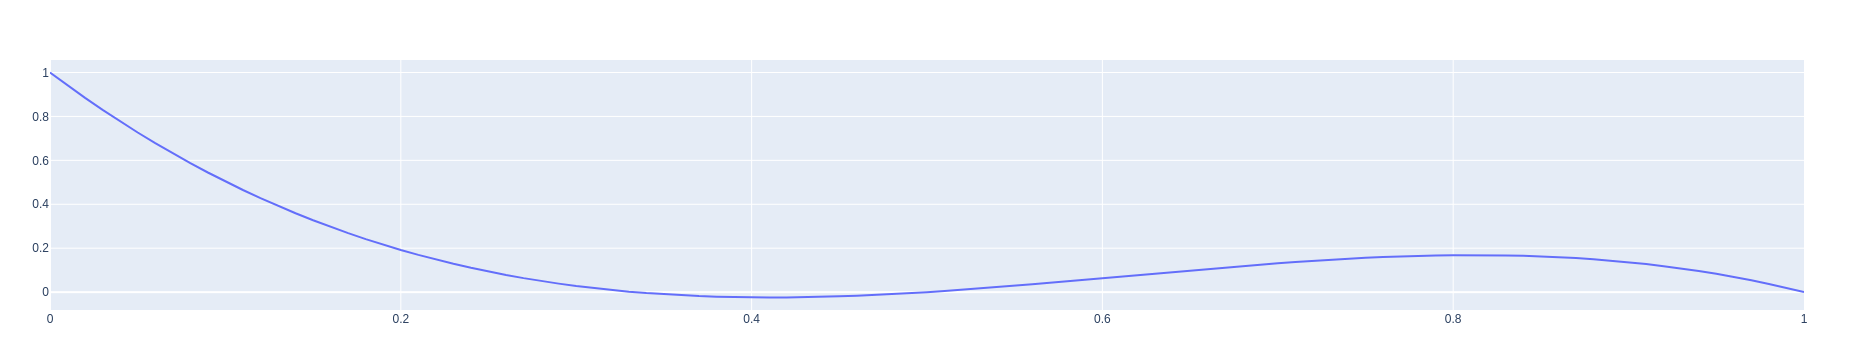

In [44]:
function eqn(R::Float64)
    sum::Float64 = 0.
    pow::Float64 = 1
    coeffs::Vector{Float64} = [1., -6., 11., -6.
    ]
    for coeff in coeffs
        sum += coeff*pow
        pow*=R
    end
    return sum
end

rd = 0.:0.01:1.
ry = eqn.( rd)
trace1 = scatter(x=rd, y=ry,
                mode="lines",
                name="power")
display(plot(trace1))
    




In [ ]:
rd = 0.001:0.001:2
list = Vector{GenericTrace}(undef,0)
for base in 0.1:0.1:2
    ry = map(pow -> base^pow, rd)
    trace1 = scatter(x=rd, y=ry,
                    mode="lines",
                    name="fuck")
    display(plot(trace1))
end

